In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supercharge-locations/Supercharge Locations.csv


This is a project to analyze the SuperCharge location data.

In [31]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


pd.options.mode.chained_assignment = None

In [32]:
# Data Input on Kraggle
df = pd.read_csv("/kaggle/input/supercharge-locations/Supercharge Locations.csv", encoding='latin-1')

Let's explore the dataset first.

In [33]:
# Have a look at the table
df.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date,Unnamed: 11
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013,NaN
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013,NaN
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012,NaN
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014,NaN
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014,NaN


In [34]:
# Data Shape
df.shape

(5876, 12)

In [35]:
# Completion of the table
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

Supercharger - 0%
Street Address - 0%
City - 0%
State - 2%
Zip - 33%
Country - 0%
Stalls - 0%
kW - 0%
GPS - 0%
Elev(m) - 0%
Open Date - 13%
Unnamed: 11 - 100%


In [36]:
# Data Types
print(df.dtypes)

Supercharger       object
Street Address     object
City               object
State              object
Zip                object
Country            object
Stalls              int64
kW                float64
GPS                object
Elev(m)             int64
Open Date          object
Unnamed: 11       float64
dtype: object


Now let's organize the dataset a little more.

In [37]:
df.drop_duplicates()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date,Unnamed: 11
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013,NaN
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013,NaN
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012,NaN
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014,NaN
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5871,"Beijing - Haidian B+W Checker, China","69-1 Banjing Rd, Haidian District",Beijing,Beijing,NaN,China,2,120.0,"39.951088, 116.281837",58,NaN,NaN
5872,"Cagnes-sur-Mer  Polygone Riviera P2, France",27-9 Rue de la Grange Rimade,Cagnes-sur-Mer,Provence-Alpes-Côte d'Azur,6800,France,4,125.0,"43.666884, 7.124728",30,NaN,NaN
5873,"Naarden, Netherlands",IJsselmeerweg 3,Naarden,North Holland,1411 AA,Netherlands,32,150.0,"52.30858, 5.141127",2,NaN,NaN
5874,"Karlskrona, Sweden",Landbron 1 (private initiative but free for al...,Karlskrona,Blekinge,371 33,Sweden,2,60.0,"56.165403, 15.585989",4,NaN,NaN


There is no duplicates. That's great! However, we see a few empty columns.

In [38]:
# Drop empty columns
df = df.dropna(axis=1, how='all')

In [39]:
# Change the data type of the Open Data column
df['Open Date']= pd.to_datetime(df['Open Date'])

In [40]:
# Now let's have look at the table.
df.sort_values(by=['Open Date'], inplace=False, ascending=True)

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,2012-11-19
854,"Gilroy, CA",681 Leavesley Rd,Gilroy,CA,95020,USA,16,150.0,"37.02493, -121.56542",63,2012-11-19
891,"Harris Ranch, CA",24505 W Dorris Ave,Coalinga,CA,93210,USA,18,150.0,"36.25415, -120.237896",139,2012-11-19
1281,"Tejon Ranch, CA",5602 Dennis McCarthy Dr,Lebec,CA,93243,USA,24,150.0,"34.98734, -118.94623",337,2012-11-19
3406,"Folsom - Iron Point Rd, CA",13000 Folsom Blvd,Folsom,CA,95630,USA,4,120.0,"38.64258, -121.18806",63,2012-11-19
...,...,...,...,...,...,...,...,...,...,...,...
5871,"Beijing - Haidian B+W Checker, China","69-1 Banjing Rd, Haidian District",Beijing,Beijing,NaN,China,2,120.0,"39.951088, 116.281837",58,NaT
5872,"Cagnes-sur-Mer  Polygone Riviera P2, France",27-9 Rue de la Grange Rimade,Cagnes-sur-Mer,Provence-Alpes-Côte d'Azur,6800,France,4,125.0,"43.666884, 7.124728",30,NaT
5873,"Naarden, Netherlands",IJsselmeerweg 3,Naarden,North Holland,1411 AA,Netherlands,32,150.0,"52.30858, 5.141127",2,NaT
5874,"Karlskrona, Sweden",Landbron 1 (private initiative but free for al...,Karlskrona,Blekinge,371 33,Sweden,2,60.0,"56.165403, 15.585989",4,NaT


It looks great now. Here are questions I would like to learn more from this dataset:

1. What's the pattern of the opening of superchargers?
2. How have the superchargers opened in different countries?
3. What countries have most superchargers?

Let's find out!

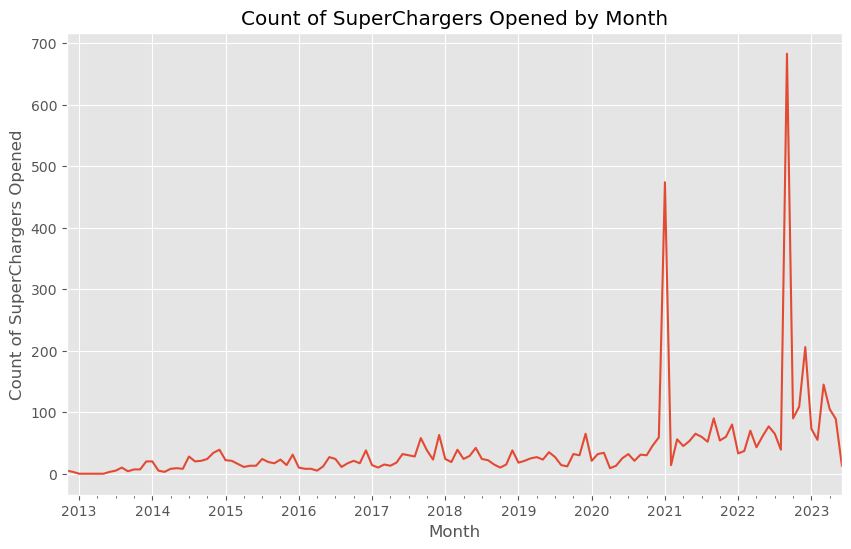

In [41]:
# Let's dig in!
# Find the chronological pattern of the opening

monthly_counts = df.resample('M', on='Open Date').size()

# Visualization
plt.figure(figsize=(10,6))
monthly_counts.plot(kind='line')
plt.title('Count of SuperChargers Opened by Month')
plt.xlabel('Month')
plt.ylabel('Count of SuperChargers Opened')
plt.show()

Now we find that the opening of superchargers spikes in the recent two years!

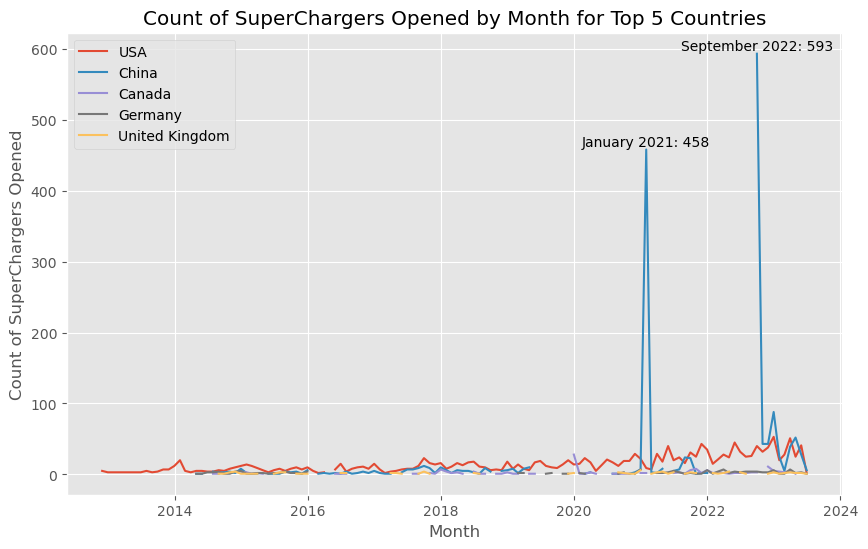

In [42]:
# How's it look like in different countries?

# Find top 5 countries with most superchargers
top_countries = df['Country'].value_counts().index[:5]
df_top_countries = df[df['Country'].isin(top_countries)]

# Group by month and country, count superchargers, and unstack to create a column for each country
monthly_counts = df_top_countries.groupby([pd.Grouper(key='Open Date', freq='M'), 'Country']).size().unstack()

# Visualization
plt.figure(figsize=(10,6))
for country in top_countries:
    plt.plot(monthly_counts.index, monthly_counts[country], label=country)
    # Label points greater than a certain threshold
    threshold = 100
    above_threshold = monthly_counts[country] > threshold
    for date, count in monthly_counts[above_threshold][country].items():
        plt.text(date, count, f'{date.strftime("%B %Y")}: {count:.0f}', ha='center', va='bottom')
plt.title('Count of SuperChargers Opened by Month for Top 5 Countries')
plt.xlabel('Month')
plt.ylabel('Count of SuperChargers Opened')
plt.legend()
plt.show()

Most of the spikes are openings in China. However, the opening count has also increased in USA.

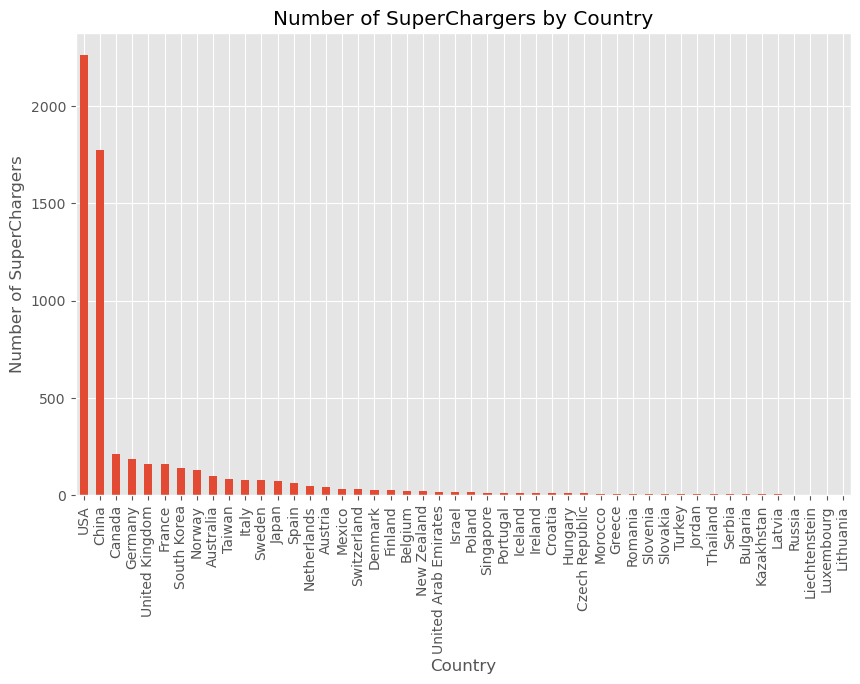

In [43]:
# Count the number of superchargers in each country
country_counts = df['Country'].value_counts()

# Visualization
plt.figure(figsize=(10,6))
country_counts.plot(kind='bar')
plt.title('Number of SuperChargers by Country')
plt.xlabel('Country')
plt.ylabel('Number of SuperChargers')
plt.show()

USA and China has most Super Chargers. However, we saw quite a few superchargers in the table that don't have an opening date. Let's figure it out.

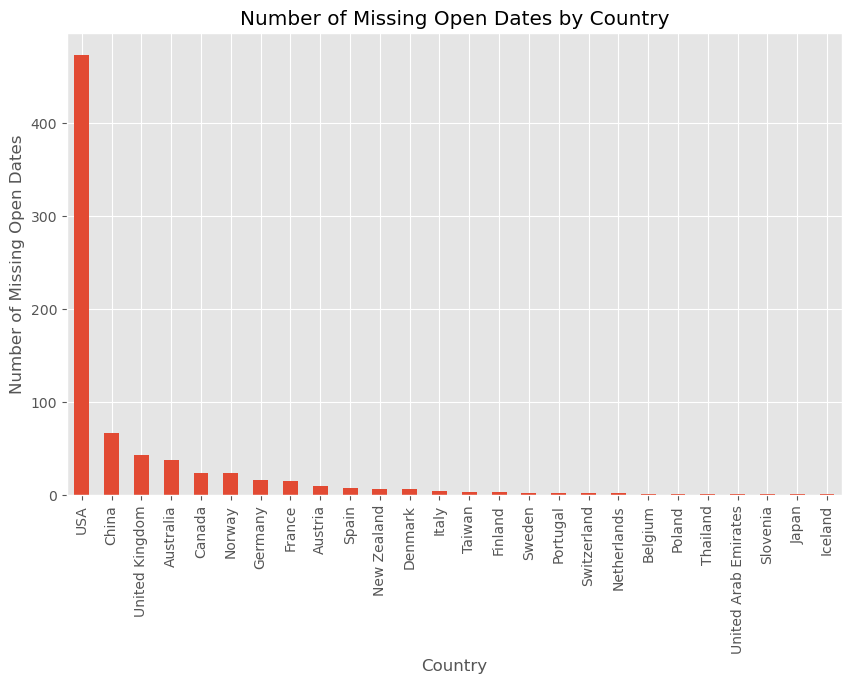

In [44]:
# Create a boolean mask of the rows where 'OpenDate' is missing
missing_dates = df['Open Date'].isna()
country_counts = df[missing_dates]['Country'].value_counts()

# Visualization
plt.figure(figsize=(10,6))
country_counts.plot(kind='bar')
plt.title('Number of Missing Open Dates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Missing Open Dates')
plt.show()

So USA has most entries that don't have an opeing date.

In [45]:
# Narrow the selection down to USA
missing_dates_usa = (df['Open Date'].isna()) & (df['Country'] == 'USA')

# See first five
examples = df[missing_dates_usa].head(5)

print(examples)

                      Supercharger      Street Address              City  \
5127        Normal - W Raab Rd, IL       610 W Raab Rd            Normal   
5128                 King City, CA        600 Canal St         King City   
5132  Burbank - N Victory Blvd, CA  677 N Victory Blvd           Burbank   
5133                  Gonzales, LA       2123 E Hwy 30          Gonzales   
5136          Upper Chichester, PA  489 Conchester Hwy  Upper Chichester   

     State    Zip Country  Stalls     kW                     GPS  Elev(m)  \
5127    IL  61761     USA      12  250.0   40.532717, -88.997291      249   
5128    CA  93930     USA      16  250.0   36.202218, -121.12983       95   
5132    CA  91506     USA      24  250.0  34.179384, -118.320974      175   
5133    LA  70737     USA       8  250.0   30.210412, -90.944365        4   
5136    PA  19014     USA       8  250.0   39.849302, -75.437827       35   

     Open Date  
5127       NaT  
5128       NaT  
5132       NaT  
5133       N

It's very interesting. All these five stations can't be found in Google Maps as an active charging station. Also, I found a permit of constrution when I was searching for the station on W Raab Rd, IL. 

Are these superchargers without opening dates are still in construction?

In [46]:
# Try to find how many stations in this table have an opening date and how many don't.
usa = df['Country'] == 'USA'
has_date = df['Open Date'].notna()
missing_date = df['Open Date'].isna()

# Count the number of superchargers in each category
count_has_date = (usa & has_date).sum()
count_missing_date = (usa & missing_date).sum()

summary = pd.DataFrame({'Open Date': ['Not Missing', 'Missing'],
                        'Count': [count_has_date, count_missing_date]})
print(summary)

     Open Date  Count
0  Not Missing   1791
1      Missing    473


Here we go.

As what I can find online. There are 1728 superchargers in USA as in April, 2023. Considering when this dataset was released, the numbers are fairly close. 

Since I can't find an API that returns Tesla's detailed supercharger data, I can only come up with the assumption:

The superchargers without Open Date in this table are still coming.


Now Let's look at the whole picture.

We know, in the past two years, the whole world has been promoting EV. Does't it show in this dataset?

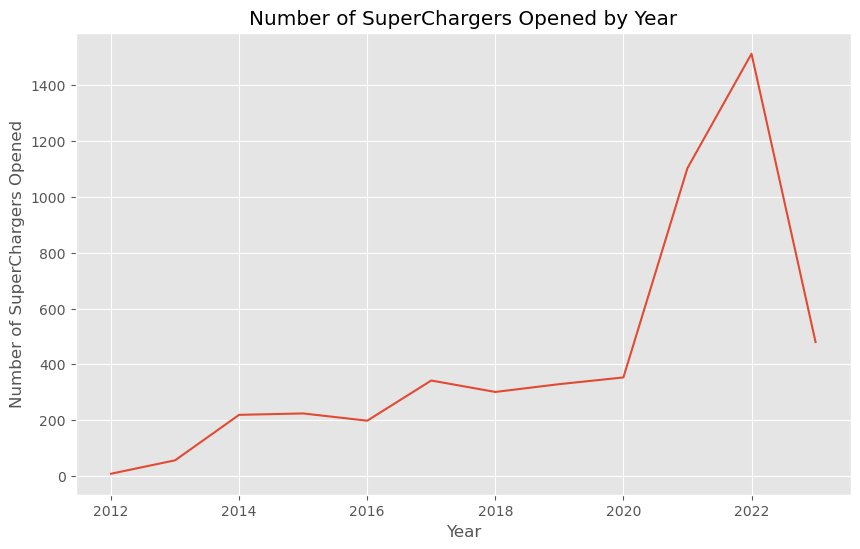

In [47]:
# Extract the year from 'OpenDate'
df['Year'] = df['Open Date'].dt.year

# Group by 'Year' and count the number of superchargers in each year
counts = df.groupby('Year').size()

# Line chart
plt.figure(figsize=(10,6))
counts.plot(kind='line')
plt.title('Number of SuperChargers Opened by Year')
plt.xlabel('Year')
plt.ylabel('Number of SuperChargers Opened')
plt.show()

Clearly, the number rocketed sin 2021, when Tesla was promoting the marketing in China. Alse, as we found earlier, the number of newly opened superchargers has been increased in USA as well.

In [48]:
# Let's see what states/provinces are promoting the EV market
top_states = df['State'].value_counts().head(5)
print(top_states)

CA           496
Guangdong    246
Zhejiang     224
Shanghai     183
FL           170
Name: State, dtype: int64


In [49]:
# Let's narrow it back down in USA
usa_open = df[(df['Country'] == 'USA') & (df['Open Date'].notnull())]
top_open_states = usa_open['State'].value_counts().head(5)
print(top_open_states)

CA    358
FL    134
TX    123
NY     82
PA     65
Name: State, dtype: int64


In [50]:
# See those in construction
usa_not_open = df[(df['Country'] == 'USA') & (df['Open Date'].isnull())]
top_not_open_states = usa_not_open['State'].value_counts().head(5)
print(top_not_open_states)

CA    138
TX     40
FL     36
MD     18
OH     17
Name: State, dtype: int64


In [51]:
# Let's get a table of countries that have most active superchargers
open_data = df[df['Open Date'].notnull()]
top_open_countries = open_data['Country'].value_counts().head(5)
print(top_open_countries)

USA        1791
China      1706
Canada      186
Germany     170
France      145
Name: Country, dtype: int64


In [52]:
# And with most in construction
not_open_data = df[df['Open Date'].isnull()]
top_not_open_countries = not_open_data['Country'].value_counts().head(5)
print(top_not_open_countries)

USA               473
China              67
United Kingdom     43
Australia          37
Canada             23
Name: Country, dtype: int64


That's what I have found form this amazing dataset.

This is a very simple project built with rustic skills.


Thank you for exploring the data with me! Have a great one!